In [1]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib.animation as animation
import pandas as pd

In [2]:
import pandas as pd

nodes_data = [
    {"id": 1, "name": "London", "latitude": 51.5074, "longitude": -0.1278},
    {"id": 2, "name": "Paris", "latitude": 48.8566, "longitude": 2.3522},
    {"id": 3, "name": "Lille", "latitude": 50.6292, "longitude": 3.0573},
    {"id": 4, "name": "Brussels", "latitude": 50.8503, "longitude": 4.3517},
    {"id": 5, "name": "Amsterdam", "latitude": 52.3676, "longitude": 4.9041},
    {"id": 6, "name": "Cologne", "latitude": 50.9375, "longitude": 6.9603},
    {"id": 7, "name": "Le Mans", "latitude": 48.0061, "longitude": 0.1996},
    {"id": 8, "name": "Rennes", "latitude": 48.1173, "longitude": -1.6778},
    {"id": 9, "name": "Tours", "latitude": 47.3941, "longitude": 0.6848},
    {"id": 10, "name": "Bordeaux", "latitude": 44.8378, "longitude": -0.5792},
    {"id": 11, "name": "Lyon", "latitude": 45.7640, "longitude": 4.8357},
    {"id": 12, "name": "Marseille", "latitude": 43.2965, "longitude": 5.3698},
    {"id": 13, "name": "Pagny-Sur-Moselle", "latitude": 49.1193, "longitude": 6.1757},
    {"id": 14, "name": "Strasbourg", "latitude": 48.5734, "longitude": 7.7521},
        # {"id": 15, "name": "Croisilles", "latitude": 50.5175, "longitude": 2.8635},
    {"id": 15, "name": "Croisilles", "latitude": 50.2175, "longitude": 2.8635},
    {"id": 16, "name": "Courtalain", "latitude": 48.1807, "longitude": 1.1707},
    {"id": 17, "name": "Vergigny", "latitude": 47.9842, "longitude": 3.7423},
]

# Update the edges data according to the new information provided
edges_data = [
    {"source": 1, "target": 3, "type": "affected"},  # London to Lille
    {"source": 3, "target": 4, "type": "affected"},  # Lille to Brussels
    {"source": 4, "target": 5, "type": "affected"},  # Brussels to Amsterdam
    {"source": 4, "target": 6, "type": "affected"},  # Brussels to Cologne
    {"source": 16, "target": 7, "type": "affected"},  # Courtalain to Le Mans
    {"source": 7, "target": 8, "type": "affected"},  # Le Mans to Rennes
    {"source": 13, "target": 2, "type": "affected"}, # Pagny-Sur-Moselle to Paris
    {"source": 11, "target": 17, "type": "unaffected"}, # Lyon to Vergigny
    {"source": 13, "target": 14, "type": "affected"}, # Pagny-Sur-Moselle to Strasbourg
    {"source": 15, "target": 2, "type": "affected"},   # Croisilles to Paris
    {"source": 15, "target": 3, "type": "affected"},   # Croisilles to Lille
    {"source": 2, "target": 16, "type": "affected"},   # Paris to Courtalain
    {"source": 9, "target": 10, "type": "affected"},  # Tours to Bordeaux
    {"source": 9, "target": 16, "type": "affected"},  # Tours to Courtalain
    {"source": 2, "target": 17, "type": "unaffected"}, # Paris to Vergigny
    {"source": 11, "target": 12, "type": "unaffected"}, # Lyon to Marseille
]
# Create DataFrames
nodes_df = pd.DataFrame(nodes_data)
edges_df = pd.DataFrame(edges_data)

# # Save DataFrames to CSV
# nodes_df.to_csv('/mnt/data/nodes.csv', index=False)
# edges_df.to_csv('/mnt/data/edges.csv', index=False)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Nodes DataFrame", dataframe=nodes_df)
# tools.display_dataframe_to_user(name="Edges DataFrame", dataframe=edges_df)


In [3]:
# Different visualization

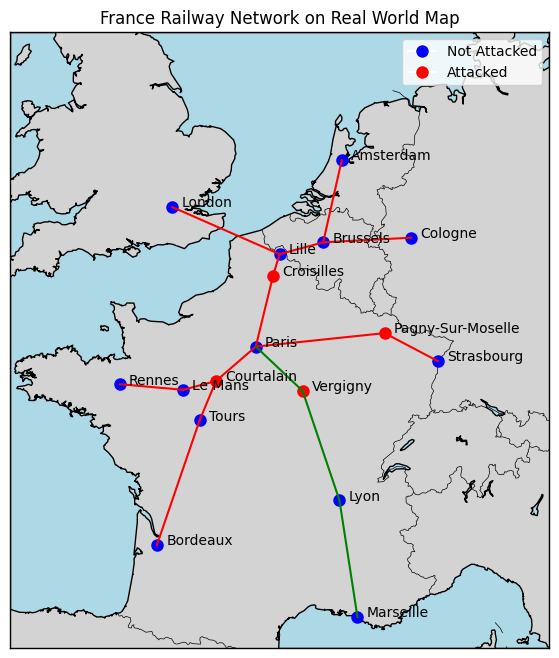

In [4]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming nodes_df and edges_df have been previously defined in your code

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with geographic information
for idx, row in nodes_df.iterrows():
    G.add_node(row['id'], pos=(row['longitude'], row['latitude']))

# Add edges
for idx, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], type=row['type'])

# List of stations that are "not attacked"
not_attacked_stations = ["Pagny-Sur-Moselle", "Vergigny", "Courtalain", "Croisilles"]

# Calculate the mean latitude and longitude
mean_lat = nodes_df['latitude'].mean()
mean_lon = nodes_df['longitude'].mean()

# Set plot limits to zoom in on the area of interest
lat_margin = 6  # Latitude margin for zoom
lon_margin = 8  # Longitude margin remains the same

# Plotting the map with Basemap
fig, ax = plt.subplots(figsize=(12, 8))

# Create a Basemap instance
m = Basemap(projection='merc', 
            llcrnrlat=mean_lat - lat_margin, urcrnrlat=mean_lat + lat_margin,
            llcrnrlon=mean_lon - lon_margin, urcrnrlon=mean_lon + lon_margin,
            lat_ts=mean_lat, resolution='i', ax=ax)

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Plot the nodes
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    color = 'red' if row['name'] in not_attacked_stations else 'blue'
    m.plot(x, y, 'o', color=color, markersize=8)
    plt.text(x + 20000, y, row['name'], fontsize=10, ha='left', color='black')

# Plot the edges
for edge in G.edges(data=True):
    source, target, data = edge
    source_pos = G.nodes[source]['pos']
    target_pos = G.nodes[target]['pos']
    x1, y1 = m(source_pos[0], source_pos[1])
    x2, y2 = m(target_pos[0], target_pos[1])
    line_color = 'red' if data['type'] == 'affected' else 'green'
    m.plot([x1, x2], [y1, y2], color=line_color)

# Add legend for node colors
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Not Attacked')
orange_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Attacked')
plt.legend(handles=[blue_patch, orange_patch], loc='upper right')

plt.title('France Railway Network on Real World Map')
plt.show()


## Node Betweeness

In [5]:
import pandas as pd
import networkx as nx

# Assuming nodes_df and G have been previously defined in your code

# Calculate betweenness centrality for each station (node) in the graph
betweenness_centrality = nx.betweenness_centrality(G)

# Convert the betweenness centrality dictionary to a DataFrame
betweenness_df = pd.DataFrame(
    betweenness_centrality.items(), columns=['Station ID', 'Betweenness Centrality']
)

# Merge with nodes data to include station names
betweenness_df = betweenness_df.merge(nodes_df, left_on='Station ID', right_on='id')

# Sort the stations by betweenness centrality in descending order
betweenness_df_sorted = betweenness_df.sort_values(by='Betweenness Centrality', ascending=False)

# Select relevant columns to display
betweenness_df_sorted = betweenness_df_sorted[['name', 'Betweenness Centrality']]

# Print the sorted DataFrame
print(betweenness_df_sorted)


                 name  Betweenness Centrality
1               Paris                0.758333
14         Croisilles                0.458333
15         Courtalain                0.433333
2               Lille                0.425000
3            Brussels                0.241667
16           Vergigny                0.233333
12  Pagny-Sur-Moselle                0.125000
10               Lyon                0.125000
8               Tours                0.125000
6             Le Mans                0.125000
9            Bordeaux                0.000000
7              Rennes                0.000000
11          Marseille                0.000000
13         Strasbourg                0.000000
5             Cologne                0.000000
4           Amsterdam                0.000000
0              London                0.000000


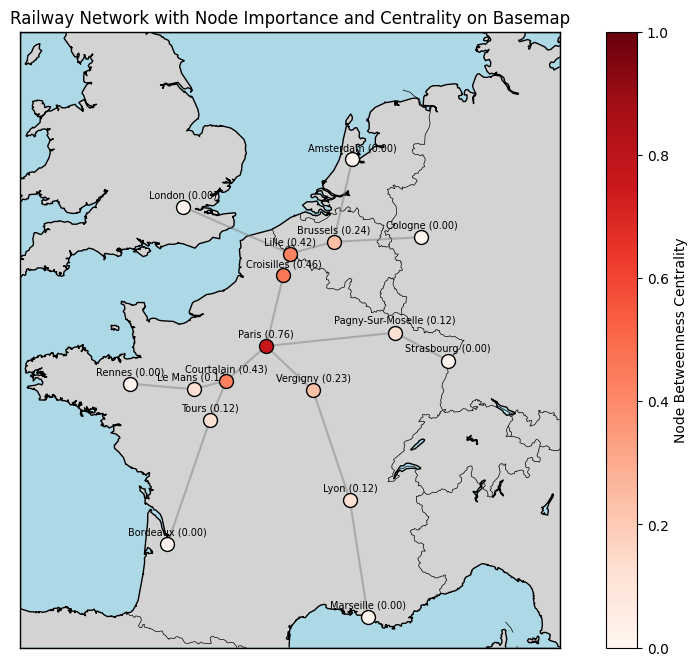

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

# Assuming nodes_df and edges_df have been previously defined in your code

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with geographic information
for idx, row in nodes_df.iterrows():
    G.add_node(row['id'], pos=(row['longitude'], row['latitude']))

# Add edges
for idx, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], type=row['type'])

# Calculate node betweenness centrality
node_betweenness_centrality = nx.betweenness_centrality(G)

# Create a colormap for the nodes
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=0, vmax=1)
node_colors = [cmap(norm(node_betweenness_centrality[node])) for node in G.nodes()]

# Draw the graph with Basemap
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the mean latitude and longitude
mean_lat = nodes_df['latitude'].mean()
mean_lon = nodes_df['longitude'].mean()

# Set plot limits to zoom in on the area of interest
lat_margin = 6  # Latitude margin for zoom
lon_margin = 8  # Longitude margin remains the same

# Create a Basemap instance
m = Basemap(projection='merc',
            llcrnrlat=mean_lat - lat_margin, urcrnrlat=mean_lat + lat_margin,
            llcrnrlon=mean_lon - lon_margin, urcrnrlon=mean_lon + lon_margin,
            lat_ts=mean_lat, resolution='i', ax=ax)

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Draw nodes with colors based on importance
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    m.scatter(x, y, s=100, color=cmap(norm(node_betweenness_centrality[row['id']])), edgecolors='k', zorder=5)

# Draw edges without specifying colors
for edge in G.edges(data=True):
    source, target, data = edge
    source_pos = G.nodes[source]['pos']
    target_pos = G.nodes[target]['pos']
    x1, y1 = m(source_pos[0], source_pos[1])
    x2, y2 = m(target_pos[0], target_pos[1])
    m.plot([x1, x2], [y1, y2], color='grey', alpha=0.5)

# Draw labels with centrality measures outside the nodes
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    centrality_value = node_betweenness_centrality[row['id']]
    label = f"{row['name']} ({centrality_value:.2f})"
    plt.text(x, y + 20000, label, fontsize=7, ha='center', color='black')  # Adjust label position and format

# Add colorbar for node centrality
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Node Betweenness Centrality', ax=ax)

plt.title('Railway Network with Node Importance and Centrality on Basemap')
plt.show()


In [7]:
# Combined node and edge for graph 1

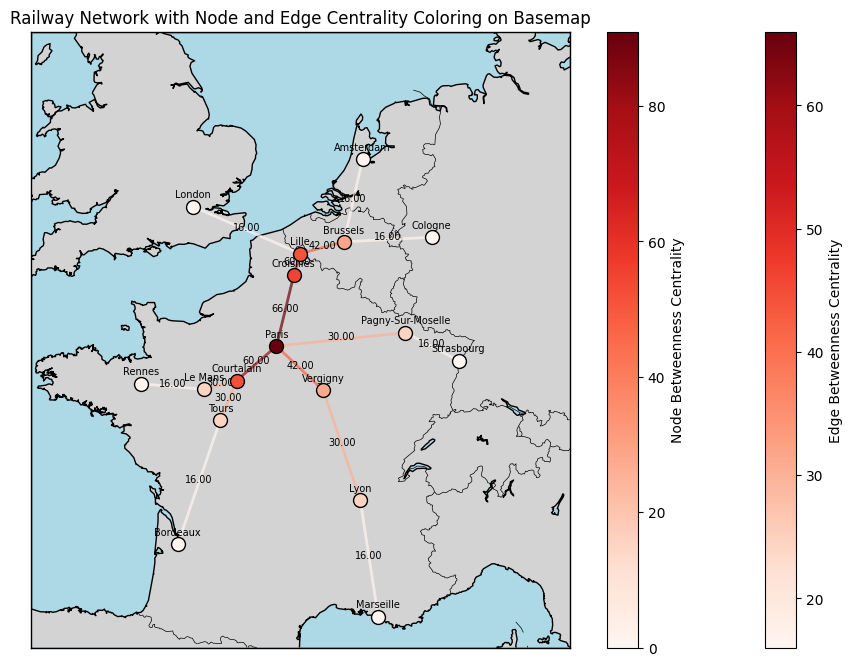

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

# Assuming nodes_df and edges_df have been previously defined in your code

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with geographic information
for idx, row in nodes_df.iterrows():
    G.add_node(row['id'], pos=(row['longitude'], row['latitude']))

# Add edges
for idx, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], type=row['type'])

# Calculate node betweenness centrality
node_betweenness_centrality = nx.betweenness_centrality(G, normalized=False)

# Calculate edge betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G, normalized=False)

# Determine the range of centrality values for nodes and edges
max_node_centrality = max(node_betweenness_centrality.values())
min_node_centrality = min(node_betweenness_centrality.values())
max_edge_centrality = max(edge_betweenness_centrality.values())
min_edge_centrality = min(edge_betweenness_centrality.values())

# Create colormaps for nodes and edges
node_cmap = plt.cm.Reds
edge_cmap = plt.cm.Reds
node_norm = mcolors.Normalize(vmin=min_node_centrality, vmax=max_node_centrality)
edge_norm = mcolors.Normalize(vmin=min_edge_centrality, vmax=max_edge_centrality)

# Draw the graph with Basemap
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the mean latitude and longitude
mean_lat = nodes_df['latitude'].mean()
mean_lon = nodes_df['longitude'].mean()

# Set plot limits to zoom in on the area of interest
lat_margin = 6  # Latitude margin for zoom
lon_margin = 8  # Longitude margin remains the same

# Create a Basemap instance
m = Basemap(projection='merc',
            llcrnrlat=mean_lat - lat_margin, urcrnrlat=mean_lat + lat_margin,
            llcrnrlon=mean_lon - lon_margin, urcrnrlon=mean_lon + lon_margin,
            lat_ts=mean_lat, resolution='i', ax=ax)

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Draw edges with colors based on edge betweenness centrality
for edge, centrality_value in edge_betweenness_centrality.items():
    source, target = edge
    source_pos = G.nodes[source]['pos']
    target_pos = G.nodes[target]['pos']
    x1, y1 = m(source_pos[0], source_pos[1])
    x2, y2 = m(target_pos[0], target_pos[1])
    m.plot([x1, x2], [y1, y2], color=edge_cmap(edge_norm(centrality_value)), alpha=0.7, linewidth=2)
    
    # Calculate the midpoint of the edge for label placement
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    plt.text(mid_x, mid_y, f"{centrality_value:.2f}", fontsize=7, ha='center', color='black')

# Draw nodes with colors based on node betweenness centrality
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    node_color = node_cmap(node_norm(node_betweenness_centrality[row['id']]))
    m.scatter(x, y, s=100, color=node_color, edgecolors='k', zorder=5)

# Add labels for nodes
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    plt.text(x, y + 20000, row['name'], fontsize=7, ha='center', color='black')

# Add colorbars for node and edge centrality
sm_edge = plt.cm.ScalarMappable(cmap=edge_cmap, norm=edge_norm)
sm_edge.set_array([])
plt.colorbar(sm_edge, label='Edge Betweenness Centrality', ax=ax)

sm_node = plt.cm.ScalarMappable(cmap=node_cmap, norm=node_norm)
sm_node.set_array([])
plt.colorbar(sm_node, label='Node Betweenness Centrality', ax=ax)

plt.title('Railway Network with Node and Edge Centrality Coloring on Basemap')
plt.show()


## Edge Betweeness

In [13]:
nodes_data = [
    {"id": 1, "name": "London", "latitude": 51.5074, "longitude": -0.1278},
    {"id": 2, "name": "Paris", "latitude": 48.8566, "longitude": 2.3522},
    {"id": 3, "name": "Lille", "latitude": 50.6292, "longitude": 3.0573},
    {"id": 4, "name": "Brussels", "latitude": 50.8503, "longitude": 4.3517},
    {"id": 5, "name": "Amsterdam", "latitude": 52.3676, "longitude": 4.9041},
    {"id": 6, "name": "Cologne", "latitude": 50.9375, "longitude": 6.9603},
    {"id": 7, "name": "Le Mans", "latitude": 48.0061, "longitude": 0.1996},
    {"id": 8, "name": "Rennes", "latitude": 48.1173, "longitude": -1.6778},
    {"id": 9, "name": "Tours", "latitude": 47.3941, "longitude": 0.6848},
    {"id": 10, "name": "Bordeaux", "latitude": 44.8378, "longitude": -0.5792},
    {"id": 11, "name": "Lyon", "latitude": 45.7640, "longitude": 4.8357},
    {"id": 12, "name": "Marseille", "latitude": 43.2965, "longitude": 5.3698},
    {"id": 14, "name": "Strasbourg", "latitude": 48.5734, "longitude": 7.7521},
    # {"id": 15, "name": "Croisilles", "latitude": 50.2175, "longitude": 2.8635},
    {"id": 16, "name": "Courtalain", "latitude": 48.1807, "longitude": 1.1707},
]

# Update the edges data according to the new information provided
edges_data = [
    {"source": 1, "target": 3, "type": "affected"},  # London to Lille
    {"source": 3, "target": 4, "type": "affected"},  # Lille to Brussels
    {"source": 4, "target": 5, "type": "affected"},  # Brussels to Amsterdam
    {"source": 4, "target": 6, "type": "affected"},  # Brussels to Cologne
    {"source": 16, "target": 7, "type": "affected"},  # Courtalain to Le Mans
    {"source": 7, "target": 8, "type": "affected"},  # Le Mans to Rennes
    {"source": 14, "target": 2, "type": "affected"}, # Strasbourg to Paris
    {"source": 11, "target": 2, "type": "unaffected"}, # Lyon to Paris
    {"source": 3, "target": 2, "type": "affected"},   # Lille to Paris
    {"source": 2, "target": 16, "type": "affected"},   # Paris to Courtalain
    {"source": 9, "target": 10, "type": "affected"},  # Tours to Bordeaux
    {"source": 9, "target": 16, "type": "affected"},  # Tours to Courtalain
    {"source": 11, "target": 12, "type": "unaffected"}, # Lyon to Marseille
]
# Create DataFrames
nodes_df = pd.DataFrame(nodes_data)
edges_df = pd.DataFrame(edges_data)

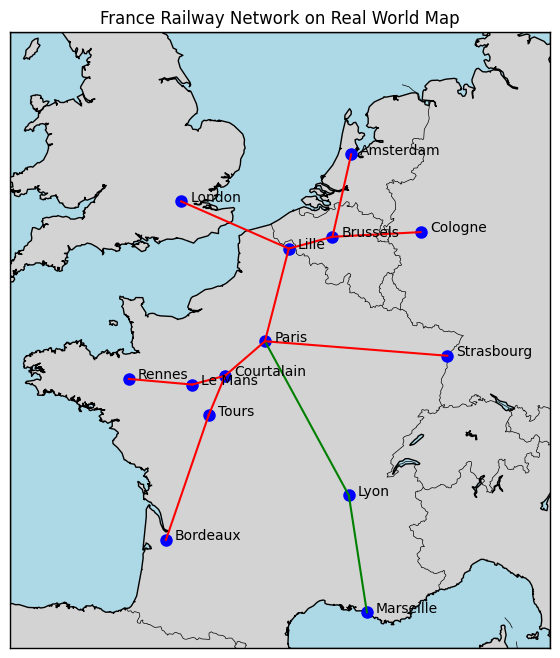

In [14]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming nodes_df and edges_df have been previously defined in your code

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with geographic information
for idx, row in nodes_df.iterrows():
    G.add_node(row['id'], pos=(row['longitude'], row['latitude']))

# Add edges
for idx, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], type=row['type'])

# Calculate the mean latitude and longitude
mean_lat = nodes_df['latitude'].mean()
mean_lon = nodes_df['longitude'].mean()

# Set plot limits to zoom in on the area of interest
lat_margin = 6  # Latitude margin for zoom
lon_margin = 8  # Longitude margin remains the same

# Plotting the map with Basemap
fig, ax = plt.subplots(figsize=(12, 8))

# Create a Basemap instance
m = Basemap(projection='merc', 
            llcrnrlat=mean_lat - lat_margin, urcrnrlat=mean_lat + lat_margin,
            llcrnrlon=mean_lon - lon_margin, urcrnrlon=mean_lon + lon_margin,
            lat_ts=mean_lat, resolution='i', ax=ax)

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Plot the nodes
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    m.plot(x, y, 'o', color='blue', markersize=8)
    plt.text(x+20000, y, row['name'], fontsize=10, ha='left', color='black')  # Larger and darker text

# Plot the edges
for edge in G.edges(data=True):
    source, target, data = edge
    source_pos = G.nodes[source]['pos']
    target_pos = G.nodes[target]['pos']
    x1, y1 = m(source_pos[0], source_pos[1])
    x2, y2 = m(target_pos[0], target_pos[1])
    line_color = 'red' if data['type'] == 'affected' else 'green'
    m.plot([x1, x2], [y1, y2], color=line_color)

plt.title('France Railway Network on Real World Map')
plt.show()


In [15]:
import networkx as nx
import pandas as pd

# Assuming nodes_df and edges_df have been previously defined in your code

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with geographic information
for idx, row in nodes_df.iterrows():
    G.add_node(row['id'], pos=(row['longitude'], row['latitude']))

# Add edges
for idx, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], type=row['type'])

# Calculate edge betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G, normalized=True)

# Ensure all edges from edges_df are accounted for in the DataFrame
all_edges = edges_df.copy()
all_edges['Betweenness Centrality'] = all_edges.apply(
    lambda row: edge_betweenness_centrality.get((row['source'], row['target']),
                                                edge_betweenness_centrality.get((row['target'], row['source']), 0)),
    axis=1
)

# Merge with nodes data to get station names
all_edges = all_edges.merge(nodes_df[['id', 'name']], left_on='source', right_on='id', suffixes=('', '_source'))
all_edges = all_edges.merge(nodes_df[['id', 'name']], left_on='target', right_on='id', suffixes=('_target', '_source'))

# Sort the edges by betweenness centrality in descending order
all_edges_sorted = all_edges.sort_values(by='Betweenness Centrality', ascending=False)

# Select relevant columns to display
all_edges_sorted = all_edges_sorted[['name_source', 'name_target', 'Betweenness Centrality', 'type']]

# Rename columns for clarity
all_edges_sorted.columns = ['From', 'To', 'Betweenness Centrality', 'Type']

# Print the sorted DataFrame
print(all_edges_sorted)


          From          To  Betweenness Centrality        Type
8        Paris       Lille                0.494505    affected
9   Courtalain       Paris                0.494505    affected
1     Brussels       Lille                0.362637    affected
4      Le Mans  Courtalain                0.263736    affected
7        Paris        Lyon                0.263736  unaffected
11  Courtalain       Tours                0.263736    affected
0        Lille      London                0.142857    affected
2    Amsterdam    Brussels                0.142857    affected
3      Cologne    Brussels                0.142857    affected
5       Rennes     Le Mans                0.142857    affected
6        Paris  Strasbourg                0.142857    affected
10    Bordeaux       Tours                0.142857    affected
12   Marseille        Lyon                0.142857  unaffected


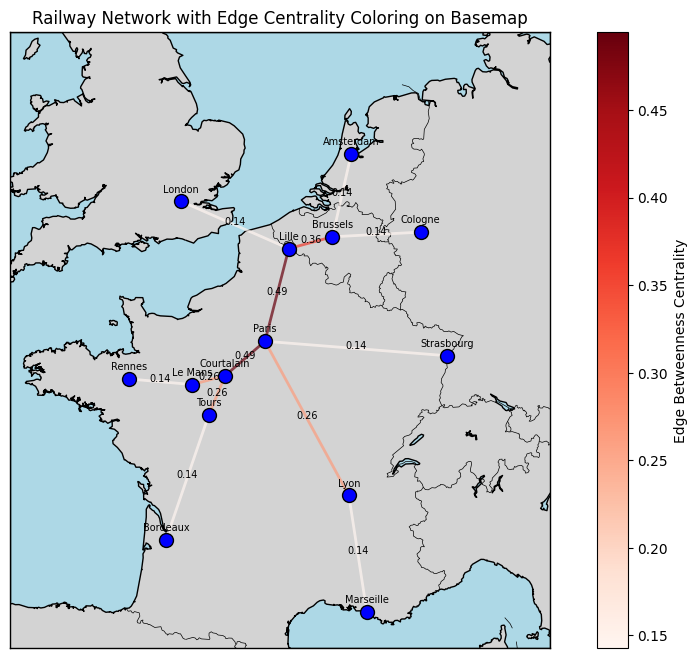

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

# Assuming nodes_df and edges_df have been previously defined in your code

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with geographic information
for idx, row in nodes_df.iterrows():
    G.add_node(row['id'], pos=(row['longitude'], row['latitude']))

# Add edges
for idx, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], type=row['type'])

# Calculate edge betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)

# Determine the range of edge centrality values
max_edge_centrality = max(edge_betweenness_centrality.values())
min_edge_centrality = min(edge_betweenness_centrality.values())

# Create a colormap for the edges
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=min_edge_centrality, vmax=max_edge_centrality)

# Draw the graph with Basemap
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the mean latitude and longitude
mean_lat = nodes_df['latitude'].mean()
mean_lon = nodes_df['longitude'].mean()

# Set plot limits to zoom in on the area of interest
lat_margin = 6  # Latitude margin for zoom
lon_margin = 8  # Longitude margin remains the same

# Create a Basemap instance
m = Basemap(projection='merc',
            llcrnrlat=mean_lat - lat_margin, urcrnrlat=mean_lat + lat_margin,
            llcrnrlon=mean_lon - lon_margin, urcrnrlon=mean_lon + lon_margin,
            lat_ts=mean_lat, resolution='i', ax=ax)

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Draw nodes
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    m.scatter(x, y, s=100, color='blue', edgecolors='k', zorder=5)

# Draw edges with colors based on edge betweenness centrality
for edge, centrality_value in edge_betweenness_centrality.items():
    source, target = edge
    source_pos = G.nodes[source]['pos']
    target_pos = G.nodes[target]['pos']
    x1, y1 = m(source_pos[0], source_pos[1])
    x2, y2 = m(target_pos[0], target_pos[1])
    m.plot([x1, x2], [y1, y2], color=cmap(norm(centrality_value)), alpha=0.7, linewidth=2)
    
    # Calculate the midpoint of the edge for label placement
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    plt.text(mid_x, mid_y, f"{centrality_value:.2f}", fontsize=7, ha='center', color='black')

# Add labels for nodes
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    plt.text(x, y + 20000, row['name'], fontsize=7, ha='center', color='black')

# Add colorbar for edge centrality
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Edge Betweenness Centrality', ax=ax)

plt.title('Railway Network with Edge Centrality Coloring on Basemap')
plt.show()


# Combined Node and Edge

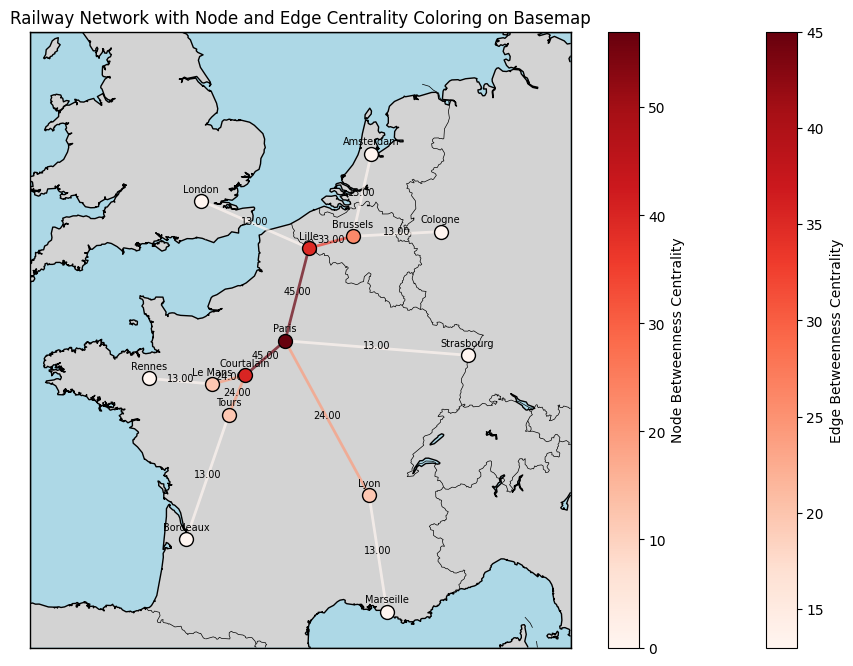

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

# Assuming nodes_df and edges_df have been previously defined in your code

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with geographic information
for idx, row in nodes_df.iterrows():
    G.add_node(row['id'], pos=(row['longitude'], row['latitude']))

# Add edges
for idx, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], type=row['type'])

# Calculate node betweenness centrality
node_betweenness_centrality = nx.betweenness_centrality(G, normalized=False)

# Calculate edge betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G, normalized=False)

# Determine the range of centrality values for nodes and edges
max_node_centrality = max(node_betweenness_centrality.values())
min_node_centrality = min(node_betweenness_centrality.values())
max_edge_centrality = max(edge_betweenness_centrality.values())
min_edge_centrality = min(edge_betweenness_centrality.values())

# Create colormaps for nodes and edges
node_cmap = plt.cm.Reds
edge_cmap = plt.cm.Reds
node_norm = mcolors.Normalize(vmin=min_node_centrality, vmax=max_node_centrality)
edge_norm = mcolors.Normalize(vmin=min_edge_centrality, vmax=max_edge_centrality)

# Draw the graph with Basemap
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the mean latitude and longitude
mean_lat = nodes_df['latitude'].mean()
mean_lon = nodes_df['longitude'].mean()

# Set plot limits to zoom in on the area of interest
lat_margin = 6  # Latitude margin for zoom
lon_margin = 8  # Longitude margin remains the same

# Create a Basemap instance
m = Basemap(projection='merc',
            llcrnrlat=mean_lat - lat_margin, urcrnrlat=mean_lat + lat_margin,
            llcrnrlon=mean_lon - lon_margin, urcrnrlon=mean_lon + lon_margin,
            lat_ts=mean_lat, resolution='i', ax=ax)

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Draw edges with colors based on edge betweenness centrality
for edge, centrality_value in edge_betweenness_centrality.items():
    source, target = edge
    source_pos = G.nodes[source]['pos']
    target_pos = G.nodes[target]['pos']
    x1, y1 = m(source_pos[0], source_pos[1])
    x2, y2 = m(target_pos[0], target_pos[1])
    m.plot([x1, x2], [y1, y2], color=edge_cmap(edge_norm(centrality_value)), alpha=0.7, linewidth=2)
    
    # Calculate the midpoint of the edge for label placement
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    plt.text(mid_x, mid_y, f"{centrality_value:.2f}", fontsize=7, ha='center', color='black')

# Draw nodes with colors based on node betweenness centrality
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    node_color = node_cmap(node_norm(node_betweenness_centrality[row['id']]))
    m.scatter(x, y, s=100, color=node_color, edgecolors='k', zorder=5)

# Add labels for nodes
for idx, row in nodes_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    plt.text(x, y + 20000, row['name'], fontsize=7, ha='center', color='black')

# Add colorbars for node and edge centrality
sm_edge = plt.cm.ScalarMappable(cmap=edge_cmap, norm=edge_norm)
sm_edge.set_array([])
plt.colorbar(sm_edge, label='Edge Betweenness Centrality', ax=ax)

sm_node = plt.cm.ScalarMappable(cmap=node_cmap, norm=node_norm)
sm_node.set_array([])
plt.colorbar(sm_node, label='Node Betweenness Centrality', ax=ax)

plt.title('Railway Network with Node and Edge Centrality Coloring on Basemap')
plt.show()
